In [1]:
import pandas as pd
import numpy as np
import random
import scipy.stats
import math
import seaborn as sns
from matplotlib import pyplot as plt
from random import sample
from scipy.stats import chisquare
from scipy.stats import geom
from scipy.stats import t
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from matplotlib.ticker import AutoMinorLocator
import statsmodels.api as sm
%matplotlib inline

In [18]:
loans_full_schema = pd.read_csv("data/loans_full_schema.csv")
loans_full_schema.head()
loans_full_schema.columns

Index(['emp_title', 'emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'annual_income_joint',
       'verification_income_joint', 'debt_to_income_joint', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankr

In [57]:
subset = ["interest_rate", "verified_income", "debt_to_income", "total_credit_limit", "total_credit_utilized", "public_record_bankrupt", "term", "issue_month", "inquiries_last_12m"]
loans = loans_full_schema[subset]
loans["total_credit_utilized"] = loans.apply(lambda x: loans["total_credit_utilized"][x.index] / loans_full_schema["total_credit_limit"][x.index])["total_credit_utilized"]
loans.drop("total_credit_limit",axis=1,inplace=True)
loans.rename(columns={"verified_income":"income_ver", "total_credit_utilized":"credit_util", "public_record_bankrupt": "bankruptcy", "inquiries_last_12m":"credit_checks"}, inplace=True)
loans

C:\Users\murat\AppData\Local\Temp\ipykernel_6488\1166916231.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans["total_credit_utilized"] = loans.apply(lambda x: loans["total_credit_utilized"][x.index] / loans_full_schema["total_credit_limit"][x.index])["total_credit_utilized"]
C:\Users\murat\AppData\Local\Temp\ipykernel_6488\1166916231.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans.drop("total_credit_limit",axis=1,inplace=True)
C:\Users\murat\AppData\Local\Temp\ipykernel_6488\1166916231.py:5: SettingWithCopyWarning: 
A value is trying to be set o

,interest_rate,income_ver,debt_to_income,credit_util,bankruptcy,term,issue_month,credit_checks
0,14.07,Verified,18.01,0.547595,0,60,Mar-2018,6
1,12.61,Not Verified,5.04,0.150035,1,36,Feb-2018,1
2,17.09,Source Verified,21.15,0.661348,0,36,Feb-2018,4
3,6.72,Not Verified,10.16,0.196732,0,36,Jan-2018,0
4,14.07,Verified,57.96,0.754908,0,36,Mar-2018,7
...,...,...,...,...,...,...,...,...
9995,7.35,Source Verified,22.28,0.391390,1,36,Jan-2018,5
9996,19.03,Verified,32.38,0.265850,0,36,Feb-2018,1
9997,23.88,Verified,45.26,0.275463,0,36,Feb-2018,0
9998,5.32,Source Verified,11.99,0.093865,0,36,Feb-2018,1


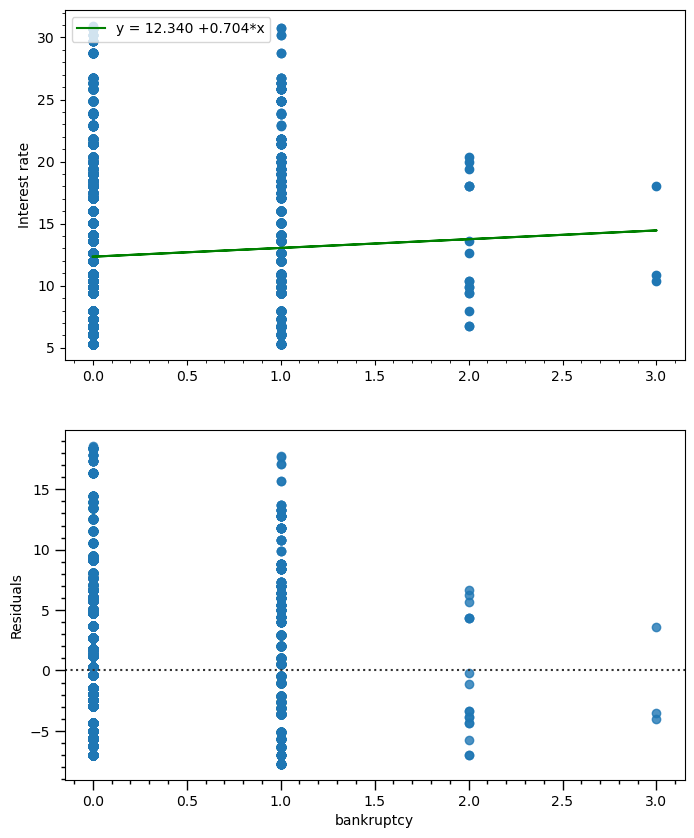

In [64]:
x = np.array(loans["bankruptcy"])
y = np.array(loans["interest_rate"])

model = LinearRegression()
model.fit(x.reshape(-1, 1), y) #reshape needed.
weight_pre = model.predict(x.reshape(-1, 1)) #reshape needed.
b0, b1 = model.intercept_, model.coef_[0]
model_text = f"y = {b0:.3f} {b1:+.3f}*x"

fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(2,1,1)
ax.scatter(x, y)
ax.plot(x, weight_pre, color="green", label=model_text)
ax.set_ylabel("Interest rate")
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.legend(loc="upper left")

ax1 = fig.add_subplot(2,1,2)
sns.residplot(x=x,y=y)
ax1.set_xlabel("bankruptcy")
ax1.set_ylabel("Residuals")
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both', width=1)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=3)